<a href="https://colab.research.google.com/github/Ruwai/DS-Sprint-01-Dealing-With-Data/blob/master/module1-afirstlookatdata/LS_DS_111_A_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [1]:
# TODO - we'll be doing this live, taking requests
# and reproducing what it is to look up and learn things
1+1

2

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example
#ok cool
import numpy
import scipy
import pandas
import sklearn
import matplotlib
import statsmodels

In [26]:
import time
print('Last updated: %s' %time.strftime('%d/%m/%Y'))
import numpy as np

def matrix_lstsqr(x, y):
    """ Computes the least-squares solution to a linear matrix equation. """
    X = np.vstack([x, np.ones(len(x))]).T
    return (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)

Last updated: 08/01/2019


In [0]:
def classic_lstsqr(x_list, y_list):
    """ Computes the least-squares solution to a linear matrix equation. """
    N = len(x_list)
    x_avg = sum(x_list)/N
    y_avg = sum(y_list)/N
    var_x, cov_xy = 0, 0
    for x,y in zip(x_list, y_list):
        temp = x - x_avg
        var_x += temp**2
        cov_xy += temp * (y - y_avg)
    slope = cov_xy / var_x
    y_interc = y_avg - slope*x_avg
    return (slope, y_interc)

In [28]:
import random
import numpy as np

random.seed(12345)

x = [x_i*random.randrange(8,12)/10 for x_i in range(500)]
y = [y_i*random.randrange(8,12)/10 for y_i in range(100,600)]

np.testing.assert_almost_equal(
    classic_lstsqr(x, y), matrix_lstsqr(x, y), decimal=5)  
    
print('ok')

ok


In [0]:
%matplotlib inline


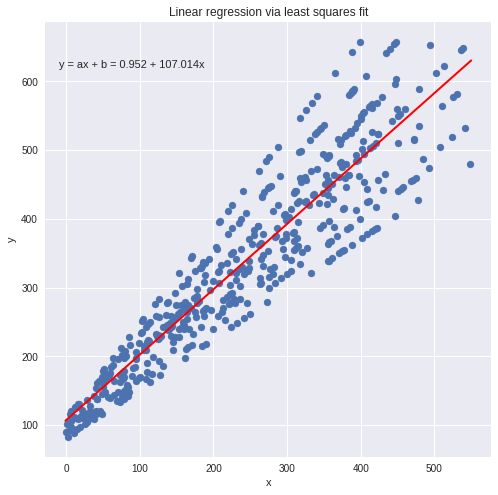

In [30]:
from matplotlib import pyplot as plt
import random

random.seed(12345)

x = [x_i*random.randrange(8,12)/10 for x_i in range(500)]
y = [y_i*random.randrange(8,12)/10 for y_i in range(100,600)]

slope, intercept = matrix_lstsqr(x, y)

line_x = [round(min(x)) - 1, round(max(x)) + 1]
line_y = [slope*x_i + intercept for x_i in line_x]

plt.figure(figsize=(8,8))
plt.scatter(x,y)
plt.plot(line_x, line_y, color='red', lw='2')

plt.ylabel('y')
plt.xlabel('x')
plt.title('Linear regression via least squares fit')

ftext = 'y = ax + b = {:.3f} + {:.3f}x'\
        .format(slope, intercept)
plt.figtext(.15,.8, ftext, fontsize=11, ha='left')

plt.show()

In [0]:
import timeit
import random
random.seed(12345)

funcs =  ['classic_lstsqr', 'matrix_lstsqr']

orders_n = [10**n for n in range(1,5)]
timings = {f:[] for f in funcs}

for n in orders_n:
    x_list = ([x_i*np.random.randint(8,12)/10 for x_i in range(n)])
    y_list = ([y_i*np.random.randint(10,14)/10 for y_i in range(n)])
    x_ary = np.asarray(x_list)
    y_ary = np.asarray(y_list)
    timings['classic_lstsqr'].append(min(timeit.Timer('classic_lstsqr(x_list, y_list)', 
            'from __main__ import classic_lstsqr, x_list, y_list')\
                                         .repeat(repeat=3, number=1000)))
    timings['matrix_lstsqr'].append(min(timeit.Timer('matrix_lstsqr(x_ary, y_ary)', 
            'from __main__ import matrix_lstsqr, x_ary, y_ary')\
                                         .repeat(repeat=3, number=1000)))

In [0]:
import matplotlib.pyplot as plt

def plot(timings, title, labels, orders_n):
    plt.rcParams.update({'font.size': 12})

    fig = plt.figure(figsize=(11,10))
    for lb in labels:
        plt.plot(orders_n, timings[lb], alpha=0.5, label=labels[lb], 
                 marker='o', lw=3)
    plt.xlabel('sample size n')
    plt.ylabel('time per computation in milliseconds')
    #plt.xlim([min(orders_n) / 10, max(orders_n)* 10])
    plt.legend(loc=2)
    plt.grid()
    plt.xscale('log')
    plt.yscale('log')
    plt.title(title)
    plt.show()

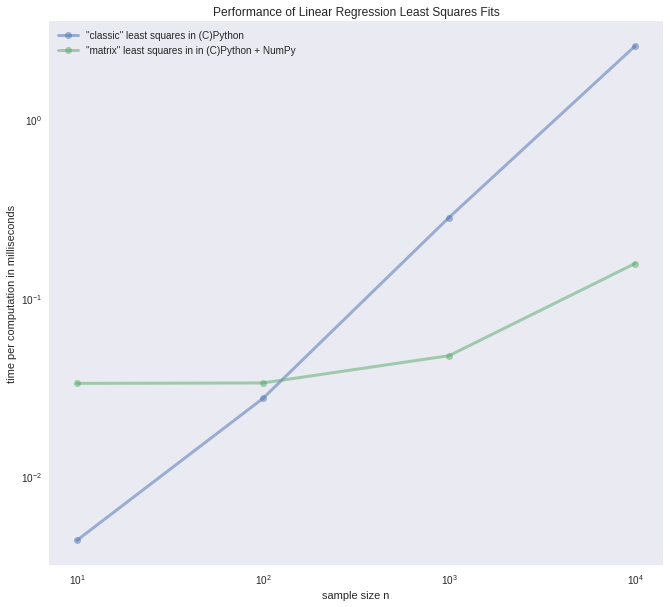

In [35]:
title = 'Performance of Linear Regression Least Squares Fits'

labels = {'classic_lstsqr': '"classic" least squares in (C)Python',
          'matrix_lstsqr': '"matrix" least squares in in (C)Python + NumPy',
         }
plot(timings, title, labels, orders_n)

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

2.  What was the most challenging part of what you did?

3.  What was the most interesting thing you learned?

4.  What area would you like to explore with more time?




## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about